# Gradient Descent on Simple Linear Regression

The following example was modifed based on online source, author id: aw7633

## Part 1

x = [30., 40., 40., 50., 60., 70., 70., 70., 80., 90.] List of advertising investment in $1000

y = [184.4, 279.1, 244.0, 314.2, 382.2, 450.2, 423.6, 410.2, 500.4, 505.3] List of corresponding sales in $1000

The purpose is to identify relationship (hopefully accurate and reliable) between x and y, so that we can project future sales rather accurately based on the projected advertising investment.

Let's take a look at the scatter plot first.

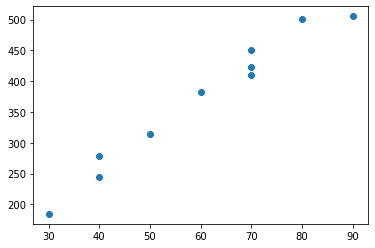

In [1]:
import matplotlib.pyplot as plt

x = [30., 40., 40., 50., 60., 70., 70., 70., 80., 90.]
y = [184.4, 279.1, 244.0, 314.2, 382.2, 450.2, 423.6, 410.2, 500.4, 505.3]

plt.scatter(x, y) # Plot scatter to observe qualitative relationships between x and y.
plt.show()

The relationship between x and y seems to be linear. Or at least good enough.
A linear relationship between x and y can be written as a linear function: y = a + bx.
Typically, x is called independent variable, input variable, or feature; 
and y is called dependent variable, or output variable.

To follow the convention, we rewrite the regression function as follows:
h(x) = t0 + t1* x (t0 regresents $\theta_0$, and so on). 

In CS, this function is called a hypothesis. 
However, there are infinitely many choices of t0 and t1 (infiniately many hypothesis).

We draw a scatter plot and visually observed that linear relationship might be a good fit. 

## Part 2

Most likely, you want a linear function or line that fits the existing data 
(called sample in Statistics and training set in CS) the best. That way, we will
feel much more comfortable making projections or predictions.

However, we have to measure/quantify/define "the fit" and "the best fit" in the first place.

How would you define the fit? 

We define fit by using the cost function ("average" squared errors). 

In python, Please define a function that takes the list of x values, the list of y values, and list of t = [t0, t1] as input and that the value of cost function as output. 

In [ ]:
def cost(x, y, t): # This only works for the case with one feature or input variable (simply speaking, one x)
    m = len(y)
    SSE = 0
    for i in range(m):
        SSE += (t[0] + t[1]*x[i] - y[i])**2
    return SSE/(2*m)

# Part 3

Now that we have defined the cost function which serves as the criterion for us to look for the best choice of t0 and t1. Our goal is to find the optimal value (minimum) of this cost function by updating t0 and t1 repeatly. 

Next, we need to actually find the optimal values for t0 and t1.
Of course, the classic Statistics has shown us a neat formula for computing optimal t0 and t1 (Least Square method). 

Here, we introduce a different approach,a computational approach to find optimal t.
This approach is called (batch) gradient descent algorithm. It might not be as elegant as the statistical approach. But it is much more practical and power in practice.


Here is how the gradient descent algorithm works.

Step 1: we pick any starting point for t. Typically, t = [0, 0] 
particularly if x and y are normalized. More on normalization in the next example.

Step 2: calculate the value of the cost function based on the chosen t.

Step 3: make a small adjustment to t by moving a samll step towards gradient direction.
The length of small step is denoted by alpha, officially called learning rate. This give you a t value at current iteration. 

Step 4: once you update t to the current iteration, plug into the cost function. Compare the cost function value at current iteration with the cost function value at previous iteration of t. (Idealy the cost function will decrease at each iteration)

Step 5: Repeat Step 3 and Step 4 until you find the difference of cost function values is small enough. 

The formula for calculate gradient descent is provided in Microsoft Word document.

Define a functin named gradient(x, y, a, t). This function takes in four parameters:
   1. list of x values
   2. list of y values
   3. learning rate alpha denoted by a
   4. and list t, note t=[t0,t1]

This function returns the list of updated t with gradient descent.

In [ ]:
def gradient(x, y, a, t): # return the updated values for t=[t0, t1]
    m = len(y)
    RSE = 0
    SUM_ex = 0
    for i in range(m):
        e = t[0] + t[1]*x[i] - y[i]
        RSE += e
        SUM_ex += e*x[i]
    t[0] = t[0] - a/m*RSE
    t[1] = t[1] - a/m*SUM_ex
    return t

## Part 4

The choice of alpha and starting theta values can be tricky. More often than not, 
the choice may not lead to convergence.

Question: what is convergence? 
value of cost function at current iteration = value of cost function at last iteration

To make gradient descent algorithm likely to converge, we can normalize our data.
There are different ways of normalizing data. For example, (x - mean)/SD.
Here, we will do the following:

(xmax - x)/(xmax - xmin)

Next we create a function named normalization. This function takes a list of numbers as input.
The output of the function is a list of normalized numbers.

After normalization, we can run gradient descent on normalized x and y.

### <font color = 'red'>Exercise:</font>
Write a function named ``normalization(x)`` to implement above. 

In [ ]:
# take a list of numbers and return a list of normalized number







### <font color = 'red'>Exercise:</font>

If we normalize x and y, the t will be the regression coefficient based on normalized x and y, named normed_t. 
normed_y=normed_t0+normed_t1 * normed_x. 

Ultimately, we want to find t based on original x and y. If you caculated normed_t, can you find out the formula to transfer back to t? 

Please write a function named back2Norm. 

This function takes five input parameters: xmax, xmin, ymax, ymin, and t.
t=[t0, t1] contains the optimal values of t0 and t1 based on normalized x and y.
This function will return to an updated list of t, which contains the values of t0
and t1 based on the original values of x and y.


## Part 5: Wrap it up. 

Write a main function to implement the steps described in **Part 3**. 

Set starting values of theta to be t = [0, 0]; learning rate a = 0.2; and 
the number of iteration of gradient descent to be 100.

For each iteration, please print the following in the same line:
iteration number, current t, current value of cost function, current value of cost function - last value of cost function

Observe whether the algorithm converges or not in the end. If not, adjust your learning rate and # of iterations.
If your algorithm converges, print out the values of t0 and t1 based on original values of x and y.


In [2]:

def normalization(x): # take a list of numbers and return a list of normalized number
    maxi = max(x)
    mini = min(x)
    return [(maxi - num)/(maxi - mini) for num in x]

def cost(x, y, t): # This only works for the case with one feature or input variable
    m = len(y)
    SSE = 0
    for i in range(m):
        SSE += (t[0] + t[1]*x[i] - y[i])**2
    return SSE/m


def gradient(x, y, a, t): # return the updated values for t=[t0, t1]
    m = len(y)
    RSE = 0
    SUM_ex = 0
    for i in range(m):
        e = t[0] + t[1]*x[i] - y[i]
        RSE += e
        SUM_ex += e*x[i]
    t[0] = t[0] - a/m*RSE
    t[1] = t[1] - a/m*SUM_ex
    return t

def back2Norm(xmax, xmin, ymax, ymin, t): # Once again, this is for SLR with one input variable
    t[0] = ymax - t[0]*(ymax - ymin) - t[1]*(ymax - ymin)*xmax/(xmax - xmin)
    t[1] = t[1]*(ymax - ymin)/(xmax - xmin)
    return t

def main():
    x0 = [30., 40., 40., 50., 60., 70., 70., 70., 80., 90.]
    y0 = [184.4, 279.1, 244.0, 314.2, 382.2, 450.2, 423.6, 410.2, 500.4, 505.3]

    x = normalization(x0)
    y = normalization(y0)

    t = [0, 0]
    a = 1.0
    Iter = 100

    PreviousCost = cost(x,y,t)
    
    for i in range(Iter):
        if i==Iter-1:
            print (i, t, cost(x,y,t), cost(x,y,t)- PreviousCost)
        PreviousCost = cost(x,y,t)        
        t = gradient(x, y, a, t)
        

    print ('The regression coefficient is', back2Norm(max(x0), min(x0), max(y0), min(y0), t))
    
if __name__ == "__main__":
    main()
    

99 [-0.09504279253340941, 1.0373599688192705] 0.0032398164688974343 -2.5875197041426434e-09
The regression coefficient is [36.4568158098715, 5.54830656874645]


## Part 6

We will plot a line chart that helps us determine whether our gradient descent algorithm converges or not.

To that end, in your main function, add a few lines of code:
save your iteration number and the corresponding value of Previous Cost - current cost. 
Plot a line chart with x-axis being the number of interations and y-axis being the decrease in the value of cost function.

Observe whether the algorithm converges or not in the end. If not, adjust your learning rate and # of iterations.

99 [-0.09504279253340941, 1.0373599688192705] 0.0032398164688974343 -2.5875197041426434e-09
[36.4568158098715, 5.54830656874645]


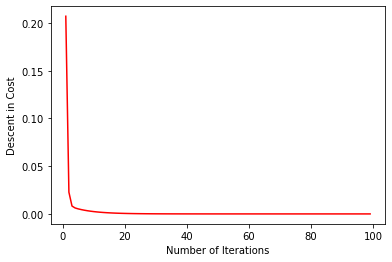

In [4]:
import matplotlib.pyplot as plt

def normalization(x): # take a list of numbers and return a list of normalized number
    maxi = max(x)
    mini = min(x)
    return [(maxi - num)/(maxi - mini) for num in x]

def cost(x, y, t): # This only works for the case with one feature or input variable
    m = len(y)
    SSE = 0
    for i in range(m):
        SSE += (t[0] + t[1]*x[i] - y[i])**2
    return SSE/m


def gradient(x, y, a, t): # return the updated values for t=[t0, t1]
    m = len(y)
    RSE = 0
    SUM_ex = 0
    for i in range(m):
        e = t[0] + t[1]*x[i] - y[i]
        RSE += e
        SUM_ex += e*x[i]
    t[0] = t[0] - a/m*RSE
    t[1] = t[1] - a/m*SUM_ex
    return t

def back2Norm(xmax, xmin, ymax, ymin, t): # Once again, this is for SLR with one input variable
    t[0] = ymax - t[0]*(ymax - ymin) - t[1]*(ymax - ymin)*xmax/(xmax - xmin)
    t[1] = t[1]*(ymax - ymin)/(xmax - xmin)
    return t

import matplotlib.pyplot as plt  
def main():
    x0 = [30., 40., 40., 50., 60., 70., 70., 70., 80., 90.]
    y0 = [184.4, 279.1, 244.0, 314.2, 382.2, 450.2, 423.6, 410.2, 500.4, 505.3]

    x = normalization(x0)
    y = normalization(y0)

    t = [0, 0]
    a = 1
    Iter = 100

    Iteration = []
    CostDescent = []
    
    PreviousCost = cost(x,y,t)
    
    for i in range(Iter):
        if i==Iter-1:
            print (i, t, cost(x,y,t), cost(x,y,t)- PreviousCost)
        Iteration.append(i)
        CostDescent.append(-cost(x,y,t) + PreviousCost)        
        PreviousCost = cost(x,y,t)        
        t = gradient(x, y, a, t)

    
    print( back2Norm(max(x0), min(x0), max(y0), min(y0), t))

# please add the code to plot the line here: 

    plt.plot(Iteration[1:], CostDescent[1:],'r')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Descent in Cost")
    
    plt.show()


      
if __name__ == "__main__":
    main()
    